#### Sales Prediction
#### (Simple Linear Regression)

Name: *Brayan Olivares*

#### Import Libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression
from sklearn.linear_model import LinearRegression

# Sample split
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Import the Dataset

In [2]:
# Importar el dataset
df = pd.read_csv('advertising.csv')

#### Data Inspection

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### Exploratory Data Analysis
#### Outlier Analysis

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


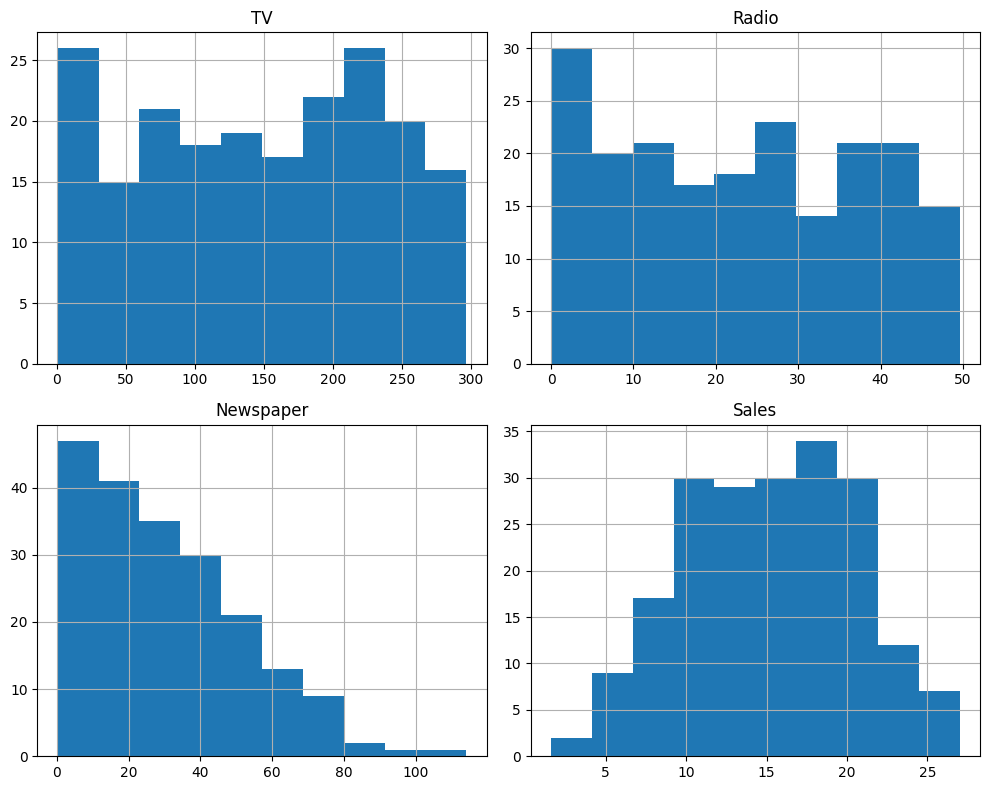

In [7]:
# Histogramas de todas las variables
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

#### Correlation Analysis

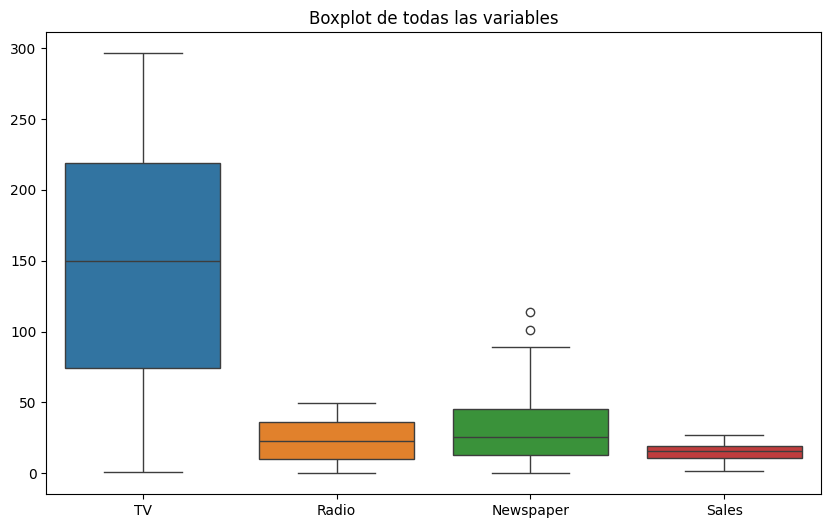

In [8]:
# Boxplots para identificar outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title('Boxplot de todas las variables')
plt.show()

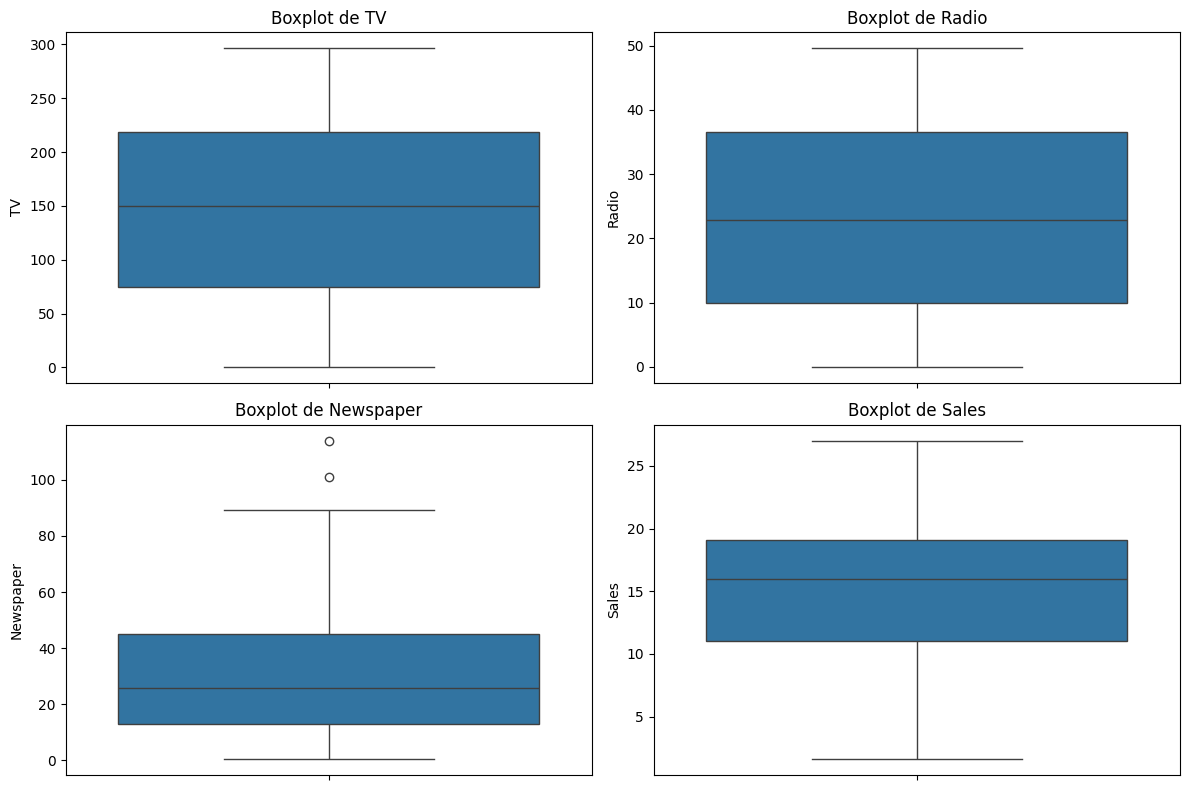

In [9]:
# Boxplots individuales para cada variable
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(df.columns):
    sns.boxplot(data=df, y=col, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

#### Correlation Analysis

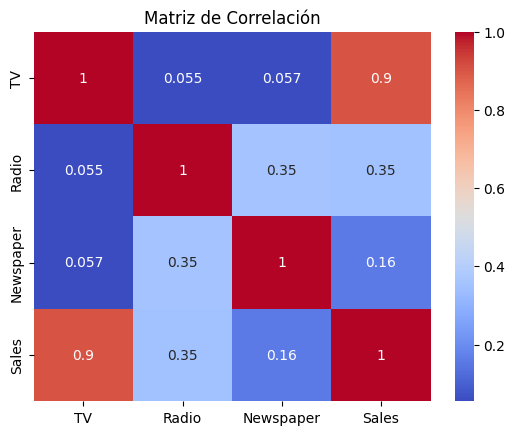

In [10]:
# Matriz de correlación
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

#### Building the model
#### Separating predictor and target

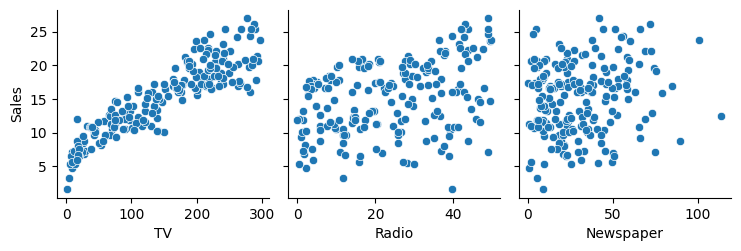

In [11]:
# Scatter plots para ver relaciones individuales con Sales
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

#### Train-Test split

In [15]:
# Separating predictor and target
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Verificar la distribución de los datos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (140, 3)
Tamaño del conjunto de prueba: (60, 3)


In [17]:
# Verificar la distribución de los datos
print("\nDistribución en entrenamiento:")
print(y_train.describe())
print("\nDistribución en prueba:")
print(y_test.describe())


Distribución en entrenamiento:
count    140.000000
mean      15.782143
std        5.144869
min        1.600000
25%       11.975000
50%       16.750000
75%       19.625000
max       27.000000
Name: Sales, dtype: float64

Distribución en prueba:
count    60.000000
mean     13.610000
std       5.333829
min       5.300000
25%      10.000000
50%      11.950000
75%      16.700000
max      25.400000
Name: Sales, dtype: float64


#### Train the model

In [18]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Evaluate the model with training data

In [19]:
# Evaluate the model with training data 
y_train_pred = model.predict(X_train)

In [20]:
# Evaluate the model with training data 
print("Métricas para datos de entrenamiento:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}")
print(f"R²: {r2_score(y_train, y_train_pred)}")

Métricas para datos de entrenamiento:
RMSE: 1.6850022732193641
R²: 0.8919647339302077


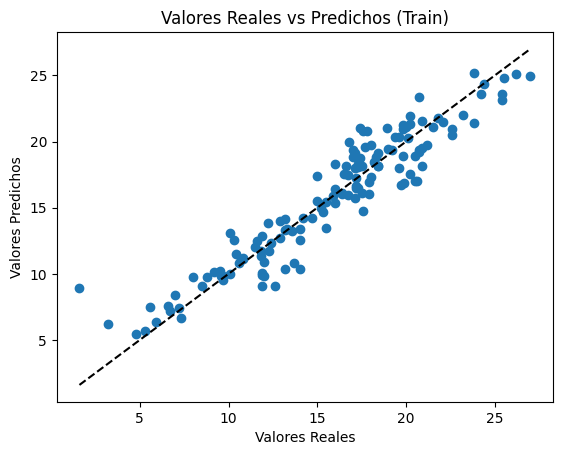

In [21]:
# Gráfico de valores reales vs predichos
plt.scatter(y_train, y_train_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs Predichos (Train)")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

#### Evaluate the model with Test data

In [22]:
# Evaluate the model with Test data 
y_test_pred = model.predict(X_test)
print("\nMétricas para datos de prueba:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"R²: {r2_score(y_test, y_test_pred)}")


Métricas para datos de prueba:
RMSE: 1.5942471691143592
R²: 0.9091484341849799
